## Основные сущности
- id транзакции
- дата оплаты
- страна
- платформа
- платежный сервис
- срок подписки
- сумма с комисией
- сумма с комисии

In [533]:
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [534]:
df = pd.read_excel('../Test/test.xlsx', sheetname='Test_2(data)') #cчитываем данные с xlsx
df['day'] = df['Date'].dt.day #выделяем дни
df['weekday'] = df['Date'].dt.weekday #и недели


## <center> Динамика выручки и прибыли

In [535]:
#Построим сводную таблицу по сумме выручки и прибыли за каждый день
df.pivot_table(['Gross','Net'], df['day'], aggfunc = 'sum')

,Gross,Net
day,,
1,7388.57,6113.92
2,2542.62,2074.19
3,2919.01,2320.37
4,2586.90,2110.64
5,3845.71,3194.28
6,1769.60,1441.76
7,2444.84,2015.01
8,6949.40,5869.48
9,1908.33,1564.23


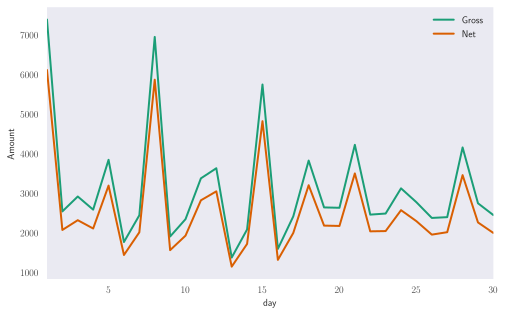

In [551]:
# Графическое представление 1
df.pivot_table(['Gross','Net'], df['day'], aggfunc = 'sum').plot(kind = 'line')
plt.ylabel('Amount');

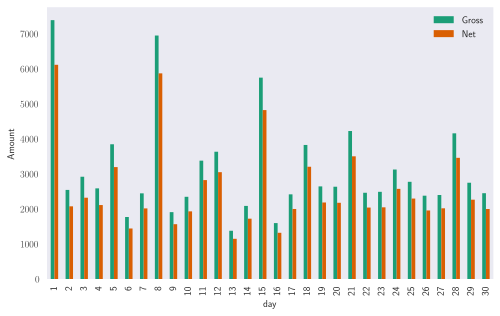

In [537]:
# Графическое представление 2
df.pivot_table(['Gross','Net'], df['day'], aggfunc = 'sum').plot(kind = 'bar')
plt.ylabel('Amount');

## <center> Структура выручки по локациям 

In [538]:
# Посмотрим информацию о выручке на разных плат
pivot = df.pivot_table(['Gross'], df['Country_Code'], aggfunc = 'sum').sort_values(by = 'Gross',ascending=False).reset_index()
pivot.head()

,Country_Code,Gross
0,RU,44184.56
1,IN,12938.48
2,US,12231.08
3,BR,6289.83
4,ID,2940.39


In [539]:
# Видим 166 уникальных локаций в нашей выборке, поэтому изменим немного нашу таблицу 
main = pivot[pivot['Gross']>=400] #берем только те, у которых выручка больше 400
# Посчитаем выручку, которая приходится на остальные локации
df['Gross'].sum() - main['Gross'].sum()

7079.8600000021979

In [540]:
# закинем в Others менее прибыльные локации
main2 = pd.DataFrame({'Country_Code': ['Others'],
                     'Gross': ['7080']}) #новая строчка
result = main.append(main2, ignore_index=True)
result['Gross'] = pd.to_numeric(result.Gross)
result

,Country_Code,Gross
0,RU,44184.56
1,IN,12938.48
2,US,12231.08
3,BR,6289.83
4,ID,2940.39
5,UA,1854.08
6,GB,1463.61
7,NG,1222.27
8,TR,1012.09
9,EG,558.46


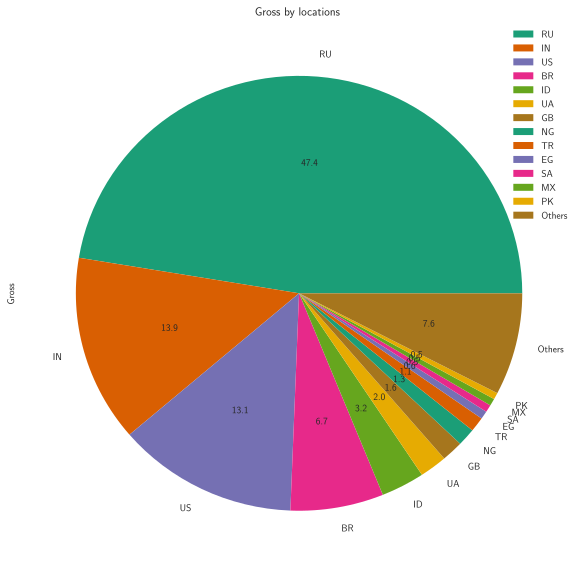

In [568]:
# Построим диаграмму выручки по локациям
result.plot(kind='pie', y = 'Gross', labels = result.Country_Code, fontsize=10, autopct="%1.1f%%", figsize=(10, 10))
plt.title('Gross by locations');

## <center> Структура выручки по платформам

,Gross
Platform,
android,1.4
desktop,88.2
ios,9.7
mobile,0.7


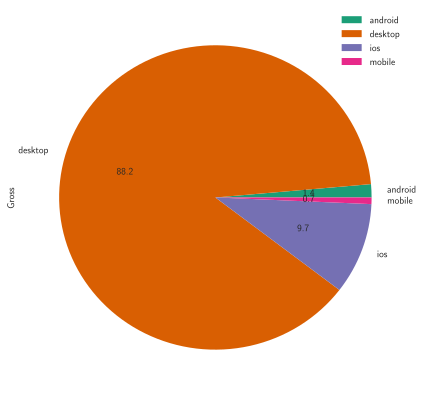

In [570]:
# Посмотрим сколько процентов выручки получаем на каждой платформе
mdf2=df.groupby('Platform')[['Gross']].aggregate(sum)/float(SUM) * 100 
mdf2.round(1).plot(kind='pie', y = 'Gross', labels = ['android', 'desktop', 'ios', 'mobile'] , autopct="%1.1f%%", figsize=(7, 7))
mdf2.round(1)

## <center> Рейтинг платежных сервисов по количеству оплат

In [543]:
df.groupby('Service_Name')[['id']].count().sort_values(by ='id', ascending=False)

,id
Service_Name,
name_5,10107
name_1,9881
name_4,1005
name_8,832
name_2,674
name_3,202
name_6,116
name_7,112


## <center> Рейтинг платежных сервисов по выручке

In [544]:
df.groupby('Service_Name')[['Gross']].sum().sort_values(by = 'Gross', ascending=False)

,Gross
Service_Name,
name_1,70282.70
name_8,11600.20
name_2,5031.87
name_4,2441.10
name_5,1713.97
name_3,1389.00
name_6,514.71
name_7,267.80


## <center> Выводы

In [545]:
print (df['Gross'].sum())
print (df['Net'].sum())

93241.35
77226.47


In [546]:
# Посмотрим основные статистические характеристики количественных признаков
df.describe()

,id,Period,Gross,Net,day,weekday
count,2.292900e+04,22929.000000,22929.000000,22929.000000,22929.000000,22929.000000
mean,3.085517e+08,6.838850,4.066525,3.368070,14.707619,3.074011
std,3.950811e+06,13.154302,5.379759,4.317228,8.578742,1.849603
min,2.056894e+08,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.052768e+08,0.000000,0.120000,0.120000,8.000000,2.000000
50%,3.086647e+08,0.000000,2.000000,1.700000,15.000000,3.000000
75%,3.116333e+08,7.000000,4.950000,4.210000,21.000000,5.000000
max,3.152957e+08,103.000000,100.000000,70.000000,30.000000,6.000000


In [555]:
# Показатель незавершенныъ заказов
ls = df[df['Gross'].map(lambda x: x == 0)]
ls['Service_Name'].value_counts() #все незавершенные заказы на платежном сервисе "name_5", на этом сервисе самое 
#большое количество оплат и относительно небольшая выручка

name_5    1780
Name: Service_Name, dtype: int64

In [548]:
# Посмотрим в какие дни недели у нас наблюдаются скачки прибыли
peack = df[df['day'].map(lambda x: x == 1 or x == 8 or x == 15)]
peack['weekday'].value_counts() # больше всего активности в среду

2    4011
5     753
Name: weekday, dtype: int64